<a href="https://colab.research.google.com/github/RMoulla/PTSCV/blob/main/Copie_de_Copie_de_TP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du sentiment avec le machine learning
Dans ce TP, nous nous intéressons à un problème de classification de textes en utilisant des techniques de machine learning, plus spécifiquement à une tâche d'analyse de sentiments (sentiment analysis).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import re

## Chargement des données.

Les données consistent en de commentaires de films en anglais (mais il y a également du bruit provenant d'autres langues). Ces commentaires peuvent être positifs ou, au contraire, négatifs selon les reviewers.
Les étudiants sont encouragés à lire quelques commentaires pour se faire une idées des données manipulées.

In [ ]:
#reviews = pd.read_csv(io.StringIO(uploaded['Reviews.csv'].decode('utf-8')))
reviews = pd.read_csv('Reviews.csv')
reviews.head(20)

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,True,25 February,Chinese people didn't like it 'cuz this game p...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,False,25 February,I don't recommend this game. I don't care abou...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,True,25 February,Deep describing of native Taiwan culture of 19...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,True,25 February,Well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,True,25 February,It's not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False
5,1006510,1,5,True,25 February,Great game from Taiwan!\nIt realistically show...,4.5,NaN,7.656120e+16,s06706s06706,11.0,1.0,False
6,1006510,1,6,True,25 February,I've played Detention before and i was told to...,4.4,NaN,7.656120e+16,Rhodger,175.0,NaN,False
7,1006510,1,7,True,25 February,Nice game,2.2,NaN,7.656120e+16,donychopper,3.0,NaN,False
8,1006510,1,8,True,25 February,definitely the scariest♥♥♥♥♥♥i've ever played,2.8,NaN,7.656120e+16,Mathe,120.0,NaN,False
9,1006510,1,9,True,25 February,"not as horror as i expected, but still a good ...",3.3,NaN,7.656120e+16,hflee1031,2.0,NaN,False


Transformer les labels en entiers.

In [ ]:
reviews['recommended'] = reviews['recommended'].astype(dtype=np.int64)
reviews.head()

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,1,25 February,Chinese people didn't like it 'cuz this game p...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,0,25 February,I don't recommend this game. I don't care abou...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,1,25 February,Deep describing of native Taiwan culture of 19...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,1,25 February,Well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,1,25 February,It's not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False


## Pré-traitement des données


In [ ]:
# Fonction qui supprime des caractères spéciaux pour nettoyer les commentaires et réduire le bruit.
def preprocess(text):

    text = text.lower()
    text=re.sub('(\\d|\\W)+',' ', text)
    return text


In [ ]:
text = 'Ceci est un Exemple qui contient les chiffres 124 et les caractères !$'
preprocess(text)

'ceci est un exemple qui contient les chiffres et les caractères '

In [ ]:
reviews['text'] = reviews['text'].apply(lambda x:preprocess(x))
reviews.head(15)

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,1,25 February,chinese people didn t like it cuz this game pr...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,0,25 February,i don t recommend this game i don t care about...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,1,25 February,deep describing of native taiwan culture of s ...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,1,25 February,well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,1,25 February,it s not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False
5,1006510,1,5,1,25 February,great game from taiwan nit realistically shows...,4.5,NaN,7.656120e+16,s06706s06706,11.0,1.0,False
6,1006510,1,6,1,25 February,i ve played detention before and i was told to...,4.4,NaN,7.656120e+16,Rhodger,175.0,NaN,False
7,1006510,1,7,1,25 February,nice game,2.2,NaN,7.656120e+16,donychopper,3.0,NaN,False
8,1006510,1,8,1,25 February,definitely the scariest i ve ever played,2.8,NaN,7.656120e+16,Mathe,120.0,NaN,False
9,1006510,1,9,1,25 February,not as horror as i expected but still a good g...,3.3,NaN,7.656120e+16,hflee1031,2.0,NaN,False


<Axes: xlabel='recommended'>

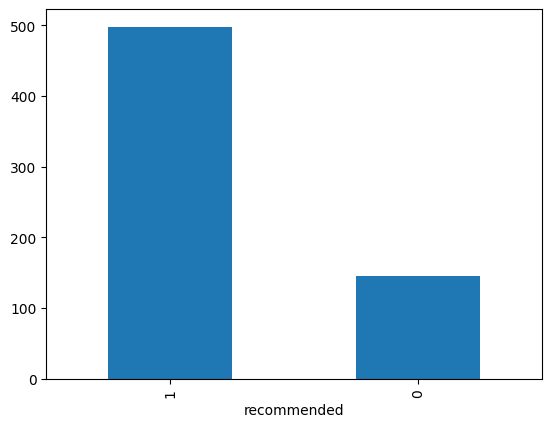

In [ ]:
# Visualisation de la variable d'intérêt
reviews['recommended'].value_counts().plot(kind='bar')

## Vectorisation

La vectorisation consiste à transformer les commentaires en vecteurs qui, pour chaque mot, contiennent la fréquence du mots en question dans le commentaire correspondant, sinon 0.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(reviews['text'])
X = vectorizer.transform(reviews['text'])
y = reviews['recommended']

In [ ]:
print(vectorizer.get_feature_names_out())

['aa' 'aaa' 'aaaaaaaahahahahaha' ... '香港可以說特首' '驚人' '點醒我們']


In [ ]:
len(vectorizer.get_feature_names_out())

5508

In [ ]:
with np.printoptions(threshold=np.inf):
      print(X.toarray()[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Splitting du dataset

D'une manière similaire aux projets de machine learning appliquées aux données tabulaires, on divise le dataset en jeu de données d'entrainement et de test.

In [ ]:
# Partitionner les données en train et test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modèle de régression logistique

On se propose ici d'implémentaire un modèle de machine learning très simple, de type régression logistique pour avoir une performance de base. Un hyperparamètre de régularisation est optimisé pour obtenir les meilleures performances.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entraîner un modèle de régression logistique


# Evaluer les performances du modèle






In [ ]:

# Entraîner un modèle de régression logistique


# Evaluer les performances du modèle

## Analyse des features du modèle

Nous allons maintenant examiner les coefficients de la régression logistique associés aux différents features (tokens).

In [ ]:
# Extraire la liste des features




# Extraire la liste des coefficients de la régression

# Sauvegarder la liste des features et des coefficients correspandants dans un dictionnaire

# Afficher le dictionnaire


In [ ]:
# Ordonner le dictionnaire par ordre décroissant par rapport aux coefficients

# Afficher les 10 premiers éléments du dictionnaire (correspondant aux coefficient les plus élevés)


In [ ]:
# Ordonner le dictionnaire par ordre croissant par rapport aux coefficients

# Afficher les 10 premiers éléments du dictionnaire (correspondant aux coefficient les plus faibles)


## Modèle random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner un modèle random forest

